<a href="https://colab.research.google.com/github/dnlgnwn-wq/Kelompok3_DecisionTree/blob/main/DanielGunawan_DecisionTree_ModelBMW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### **LOAD DATASET**

In [6]:
df = pd.read_csv("/content/bmw.csv", sep=';')
print("5 data teratas:")
display(df.head())

5 data teratas:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


### **CEK INFO DATASET**

In [3]:
print("\nInformasi dataset:")
df.info()
print("\nCek nilai kosong:")
print(df.isnull().sum())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 1 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   model;year;price;transmission;mileage;fuelType;tax;mpg;engineSize  10781 non-null  object
dtypes: object(1)
memory usage: 84.4+ KB

Cek nilai kosong:
model;year;price;transmission;mileage;fuelType;tax;mpg;engineSize    0
dtype: int64


### **PRA-PEMROSESAN DATASET**

In [7]:
# Hapus baris kosong
df = df.dropna()

# Pisahkan label (y) dan fitur (X)
y = df['model']              # Label = kolom model
X = df.drop(columns=['model'])  # Fitur = semua kolom selain model

# Ubah kolom kategorikal di fitur menjadi numerik (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)
print("\nFitur setelah encoding:")
display(X.head())


Fitur setelah encoding:


,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2014,11200,67068,125,57.6,2.0,False,False,False,False,False,False
1,2018,27000,14827,145,42.8,2.0,False,False,False,False,False,True
2,2016,16000,62794,160,51.4,3.0,False,False,False,False,False,False
3,2017,12750,26676,145,72.4,1.5,False,False,False,False,False,False
4,2014,14500,39554,160,50.4,3.0,False,False,False,False,False,False


### **SPLIT DATA (Train dan Test)**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **BUAT DAN LATIH MODEL DECISION TREE**

In [9]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

### **PREDIKSI DAN EVALUASI TABEL**



🎯 Akurasi Model: 46.27%

📊 Classification Report:
              precision    recall  f1-score   support

    1 Series       0.54      0.76      0.63       374
    2 Series       0.57      0.14      0.22       232
    3 Series       0.46      0.73      0.56       485
    4 Series       0.26      0.09      0.14       207
    5 Series       0.42      0.33      0.37       211
    6 Series       0.00      0.00      0.00        19
    7 Series       0.00      0.00      0.00        26
    8 Series       0.00      0.00      0.00         6
          M2       0.00      0.00      0.00         6
          M3       0.00      0.00      0.00         5
          M4       0.67      0.96      0.79        27
          M5       0.20      0.43      0.27         7
          M6       0.00      0.00      0.00         4
          X1       0.31      0.42      0.36       170
          X2       0.35      0.27      0.30        59
          X3       0.81      0.17      0.28       123
          X4       0.50      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


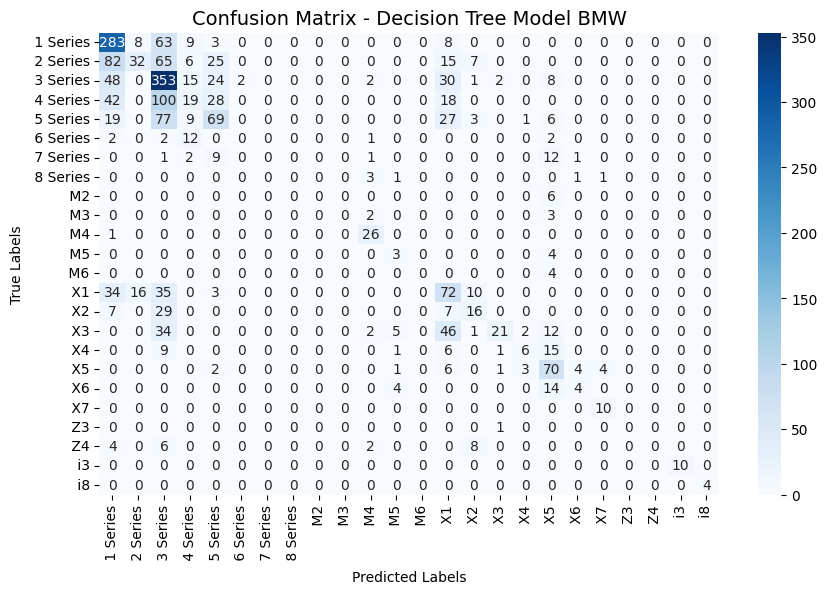

In [10]:
y_pred = model.predict(X_test)

# Hitung akurasi dalam persen
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\n🎯 Akurasi Model: {accuracy:.2f}%")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix (angka)
cm = confusion_matrix(y_test, y_pred)
print("\n🧮 Confusion Matrix (angka):")
print(cm)

# ==========================================
# 🔍 Visualisasi Confusion Matrix
# ==========================================
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Decision Tree Model BMW", fontsize=14)
plt.show()

### **VISUALISASI DECISION TREE**

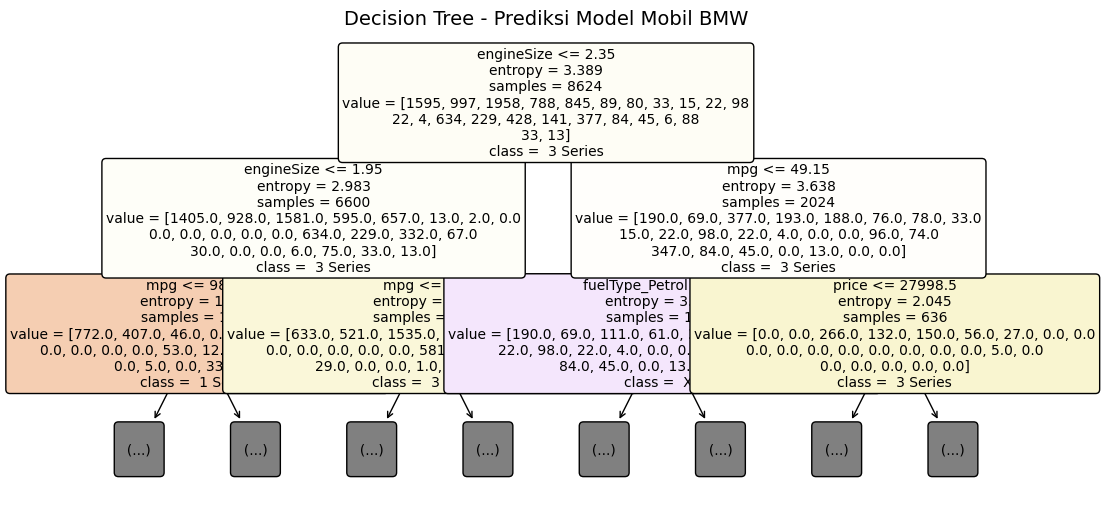

In [11]:
plt.figure(figsize=(12, 6))
plot_tree(
    model,
    filled=True,
    feature_names=X.columns,
    class_names=model.classes_,
    rounded=True,
    fontsize=10,
    max_depth=2   # 🔹 hanya tampilkan 2 level teratas (lebih ringkas dan jelas)
)
plt.title("Decision Tree - Prediksi Model Mobil BMW", fontsize=14, pad=15)
plt.show()

### **INPUTAN DARI USER UNTUK PREDIKSI MODEL**

In [12]:
print("==== PREDIKSI MANUAL ====\n")

# Input dari pengguna
tahun = int(input("Masukkan tahun mobil: "))
harga = float(input("Masukkan harga mobil (mata uang Inggris (£)): "))
transmisi = input("Masukkan jenis transmisi (Manual / Automatic / Semi-Auto): ").lower()
jarak_tempuh = float(input("Masukkan jarak tempuh (mileage): "))
bahan_bakar = input("Masukkan jenis bahan bakar (Petrol / Diesel / Hybrid / Electric / Other): ").lower()
pajak = float(input("Masukkan pajak kendaraan (tax (mata uang Inggris (£))): "))
konsumsi_bbm = float(input("Masukkan konsumsi bahan bakar (mpg - mil per galon bahan bakar): "))
ukuran_mesin = float(input("Masukkan ukuran mesin (engineSize): "))

# Buat DataFrame satu baris untuk prediksi
user_input = pd.DataFrame({
    "year": [tahun],
    "price": [harga],
    "transmission": [transmisi],
    "mileage": [jarak_tempuh],
    "fuelType": [bahan_bakar],
    "tax": [pajak],
    "mpg": [konsumsi_bbm],
    "engineSize": [ukuran_mesin]
})

# Encoding kolom kategorikal agar sesuai model
user_input = pd.get_dummies(user_input)
user_input = user_input.reindex(columns=X.columns, fill_value=0)

# Prediksi menggunakan model Decision Tree
prediksi = model.predict(user_input)[0]

print(f"\n🚗 Prediksi Model Mobil BMW: {prediksi}")

==== PREDIKSI MANUAL ====

Masukkan tahun mobil: 2012
Masukkan harga mobil (mata uang Inggris (£)): 200000
Masukkan jenis transmisi (Manual / Automatic / Semi-Auto): manual
Masukkan jarak tempuh (mileage): 30000
Masukkan jenis bahan bakar (Petrol / Diesel / Hybrid / Electric / Other): petrol
Masukkan pajak kendaraan (tax (mata uang Inggris (£))): 12000
Masukkan konsumsi bahan bakar (mpg - mil per galon bahan bakar): 30
Masukkan ukuran mesin (engineSize): 4

🚗 Prediksi Model Mobil BMW:  X7


### **MENGHITUNG WAKTU EKSEKUSI KESELURUHAN**

In [14]:
### MENGHITUNG WAKTU EKSEKUSI KESELURUHAN - DECISION TREE

import time
from sklearn.tree import DecisionTreeClassifier

# mulai menghitung waktu
start_time = time.time()

# training model
model = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
model.fit(X_train, y_train)

# prediksi
y_pred = model.predict(X_test)

# akhir waktu
end_time = time.time()

# tampilkan waktu eksekusi
execution_time = end_time - start_time
print(f"Waktu eksekusi Decision Tree: {execution_time:.4f} detik")


Waktu eksekusi Decision Tree: 0.1107 detik
